In [94]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, TimeSeriesOutcome, IntegerParameter, RealParameter)

from dike_model_function_V2_0 import (DikeNetwork,DikeNetworkTS)  # @UnresolvedImport
from problem_formulation_V2_0 import get_model_for_actor_problem_formulation

In [29]:
# Problem formulations:
#    get_model_for_actor_problem_formulation(problem_formulation_id, outcome_type='time_series')
#    problem_formulation_id options
#        1 - RWS (GOOD)
#        2 - Environmental interest group
#        3 - Transport company 
#        4 - Delta commission
#        5 - Gelderland (GOOD)
#        6 - Overijssel (GOOD)s
#        7 - Dike rings 1 and 2
#        8 - Dike ring 3
#        9 - Dike ring 4
#        10 - Dike ring 5
#
#    outcome_type options
#        'time_series' (default)
#        'scalar'


model, planning_steps = get_model_for_actor_problem_formulation(1,outcome_type='scalar')

In [30]:
#for lever in model.levers:
#    print(lever.name)

In [31]:
#for unc in model.uncertainties:
#    print(repr(unc))

In [32]:
#for outcome in model.outcomes:
#    print(repr(outcome))

In [61]:
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=2)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 2 policies * 1 model(s) = 2000 experiments
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1400 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 1800 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [131]:
experiments.iloc[1:2]

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,policy,model
1,44.0,41.682174,10,0.298935,92.142401,1,0.330714,169.456006,1.5,0.939253,89.131887,10,0.633914,220.301918,10,0.984293,4.5,3.5,3.5,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,3.0,6.0,7.0,2.0,6.0,5.0,0.0,4.0,3.0,10.0,8.0,7.0,6.0,1.0,3.0,19,dikesnet


In [167]:
#cleaned_experiments = 
experiments_uncertainties = experiments.iloc[:,0:16]
experiments_uncertainties = experiments.drop(experiments.columns[16:-2], axis=1)
experiments_levers = experiments.iloc[:,16:-1]

In [197]:
outcomes

{'Expected Annual Damage': array([ 4937318.51065006,        0.        ,        0.        , ...,
        16206432.45908909, 27598034.60971946,  3087412.97090674]),
 'Total Investment Costs': array([1.67001576e+09, 1.67001542e+09, 1.67001542e+09, ...,
        1.76554710e+09, 1.76554784e+09, 1.76554655e+09]),
 'Expected Number of Deaths': array([0.00028294, 0.        , 0.        , ..., 0.00200301, 0.00369611,
        0.00035436])}

In [171]:
outcomes.keys()

dict_keys(['Expected Annual Damage', 'Total Investment Costs', 'Expected Number of Deaths'])

In [234]:
np.percentile(data, 90)

0.012093528088147738

In [246]:
from ema_workbench.analysis import prim

data = outcomes['Expected Annual Damage']

y = data > np.percentile(data, 90)

In [247]:
prim_alg = prim.Prim(experiments_uncertainties,y, threshold=0.6)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 2000 points remaining, containing 200 cases of interest
[MainProcess/INFO] mean: 0.7184466019417476, mass: 0.0515, coverage: 0.37, density: 0.7184466019417476 restricted_dimensions: 7


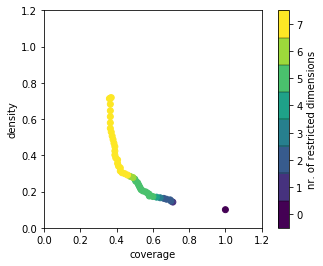

In [248]:
box1.show_tradeoff()
plt.show()

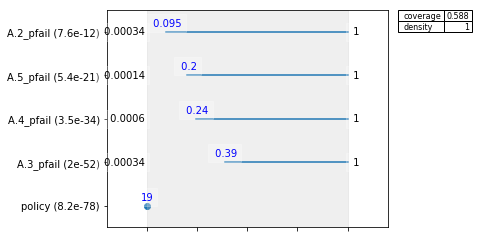

In [212]:
box1.inspect(style='graph')
plt.show()

In [160]:
box1.inspect(-1)

coverage    0.715
density         1
id             25
mass        0.143
mean            1
res_dim         5
Name: 25, dtype: object

             box -1                                                       
                min       max                                    qp values
policy         {19}      {19}                [8.043058733547508e-87, -1.0]
A.3_pfail  0.351654  0.999591                [1.172047386064772e-41, -1.0]
A.4_pfail  0.358268  0.999878                [2.212279974150925e-39, -1.0]
A.5_pfail  0.206378  0.999538               [2.3106814466962414e-17, -1.0]
A.2_pfail  0.134401   0.95635  [6.748034094738967e-14, 0.3872862284093205]



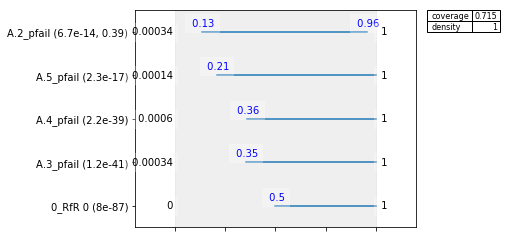

In [90]:
box1.inspect(25, style='graph')
plt.show()

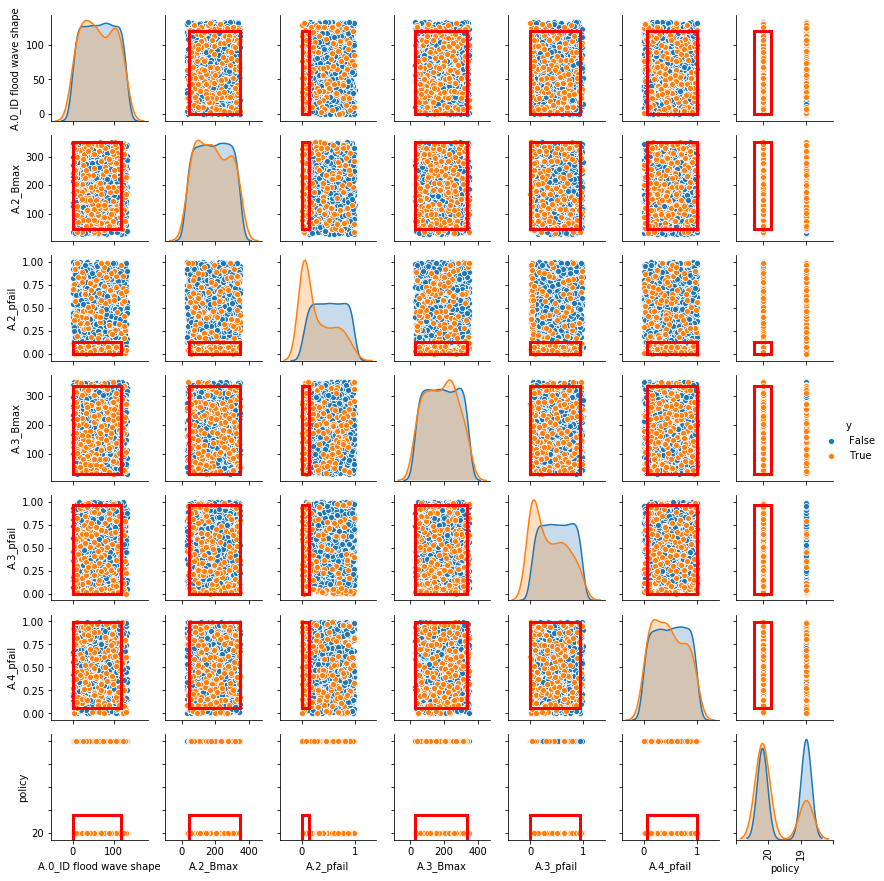

In [249]:
from ema_workbench.analysis import dimensional_stacking
box1.select(-1)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [181]:
dimensional_stacking.create_pivot_plot??

[MainProcess/INFO] model dropped from analysis because only a single category


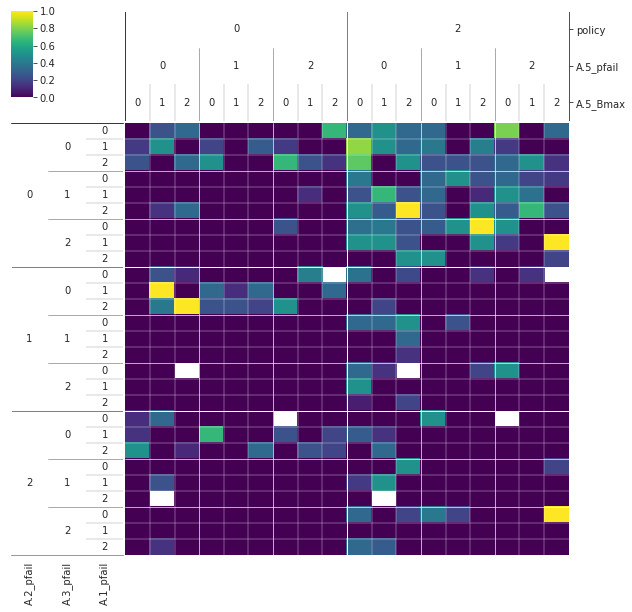

In [250]:
dimensional_stacking.create_pivot_plot(experiments_uncertainties, y,nbins=3, nr_levels=3)
plt.show()

In [245]:
list(experiments_uncertainties)

['A.0_ID flood wave shape',
 'A.1_Bmax',
 'A.1_Brate',
 'A.1_pfail',
 'A.2_Bmax',
 'A.2_Brate',
 'A.2_pfail',
 'A.3_Bmax',
 'A.3_Brate',
 'A.3_pfail',
 'A.4_Bmax',
 'A.4_Brate',
 'A.4_pfail',
 'A.5_Bmax',
 'A.5_Brate',
 'A.5_pfail',
 'policy',
 'model']